<center><h1>Final Project</h1></center>
<hr>

## Dataset

Dataset yang digunakan untuk <a href='#'>Test Drive</a> yang terdiri dari 17293 baris data dan 9 kolom.

__Attribute Information :__

* __ID Ticket__ : Nomor ID Tiket
* __Provinsi__ : Provinsi
* __Kota__ : Kota
* __Gender__ : Jenis Kelamin
* __Tahun Lahir__ : Tahun Lahir
* __Visit Time__ : Waktu Kedatangan Pengunjung
* __Test Drive Brand__ : Merk Tes Mengemudi
* __Vehicle__ : Kendaraan
* __Kategori__ : Kategori



Pertama kita <i>import</i> <i>library</i> yang akan digunakan terlebih dahulu seperti Pandas, Numpy, Matplotlib, dan Seaborn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Kemudian kita <i>load</i> dataset ke dalam dataframe Pandas dengan 
<code>read_excel()</code>.



In [ ]:
# Load dataset ke dataframe Pandas
url ='https://github.com/skywonder987/data/blob/8e29a5d27197a7d7f84335640c8ea8897f447722/test-drive.xlsx?raw=true'
df = pd.read_excel(url)
df.head(5)

,id_ticket,provinsi,kota,gender,tahun_lahir,visit_time,test_drive_brand,vehicle,kategori
0,1,DKI Jakarta,Jakarta Selatan,Male,2001.0,2021-11-15 14:00:00,Isuzu Indonesia,MU-X 4x4,Crossover SUV
1,2,Banten,Tangerang Selatan,Male,1999.0,2021-11-14 11:00:00,Mazda Indonesia,CX-3,Subcompact crossover SUV
2,3,Banten,"Tangerang, Kab.",Female,1989.0,2021-11-12 14:00:00,Honda,CR-V,crossover SUV
3,4,DKI Jakarta,Jakarta Selatan,Male,2002.0,2021-11-21 11:00:00,Hyundai Indonesia,STARIA,Minivan
4,5,Jawa Barat,"Bekasi, Kab.",Male,1998.0,2021-11-16 11:00:00,KIA,GRAND CARNIVAL,Minivan


In [ ]:
df.shape

(17293, 9)

Menampikan <code>info dataset</code>.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17293 entries, 0 to 17292
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_ticket         17293 non-null  int64         
 1   provinsi          17293 non-null  object        
 2   kota              17293 non-null  object        
 3   gender            17293 non-null  object        
 4   tahun_lahir       15621 non-null  float64       
 5   visit_time        15621 non-null  datetime64[ns]
 6   test_drive_brand  17293 non-null  object        
 7   vehicle           17293 non-null  object        
 8   kategori          17293 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.2+ MB


### Missing values

In [ ]:
df.isnull().sum()

id_ticket              0
provinsi               0
kota                   0
gender                 0
tahun_lahir         1672
visit_time          1672
test_drive_brand       0
vehicle                0
kategori               0
dtype: int64

Menghapus baris yang mengandung <i>missing values</i> dapat menggunakan fungsi <code>dropna()</code>

In [ ]:
import numpy as np

dataset=df
col=['provinsi','gender','tahun_lahir']
dataset[col]=dataset[col].replace(0, np.NaN)
dataset[col].isnull().sum()
dataset_drop = dataset
dataset_drop.dropna(inplace=True)
data_drop = dataset_drop.values

Me-reset indeks karena ada data yang terhapus

In [ ]:
df.reset_index(drop=True, inplace=True)

Mengecek jumlah missing values sudah tidak ada

In [ ]:
df.isnull().sum()

id_ticket           0
provinsi            0
kota                0
gender              0
tahun_lahir         0
visit_time          0
test_drive_brand    0
vehicle             0
kategori            0
dtype: int64

### Add Column

Menambahkan kolom usia

In [ ]:
#menambahkan kolom usia
from datetime import datetime, date

df["Usia"] = date.today().year - df["tahun_lahir"];


Membuat kategori umur

In [ ]:
# membuat kategori umur

def range_usia(x):
    if x < 18:
        return '<18'
    elif x >= 18 and x <= 24:
        return '18-24'
    elif x >= 25 and x <= 34:
        return '25-34'
    elif x >= 35 and x <= 44:
        return '35-44'
    elif x >= 45 and x <= 54:
        return '45-54'
    elif x >= 55 and x <= 64:
        return '55-64'
    elif x > 64:
        return '>64'

df['kategori_usia'] = df['Usia'].apply(range_usia)

In [ ]:
df.head()

,id_ticket,provinsi,kota,gender,tahun_lahir,visit_time,test_drive_brand,vehicle,kategori,Usia,kategori_usia
0,1,DKI Jakarta,Jakarta Selatan,Male,2001.0,2021-11-15 14:00:00,Isuzu Indonesia,MU-X 4x4,Crossover SUV,20.0,18-24
1,2,Banten,Tangerang Selatan,Male,1999.0,2021-11-14 11:00:00,Mazda Indonesia,CX-3,Subcompact crossover SUV,22.0,18-24
2,3,Banten,"Tangerang, Kab.",Female,1989.0,2021-11-12 14:00:00,Honda,CR-V,crossover SUV,32.0,25-34
3,4,DKI Jakarta,Jakarta Selatan,Male,2002.0,2021-11-21 11:00:00,Hyundai Indonesia,STARIA,Minivan,19.0,18-24
4,5,Jawa Barat,"Bekasi, Kab.",Male,1998.0,2021-11-16 11:00:00,KIA,GRAND CARNIVAL,Minivan,23.0,18-24


In [ ]:
#df.apply(lambda x: x.astype(str).str.lower())
df['kategori'] = df['kategori'].str.lower()

In [ ]:
df['kategori'].replace({'crossover suv' : 'SUV','subcompact crossover suv' : 'SUV','full-size crossover suv' : 'SUV'},inplace=True) # SUV
df['kategori'].replace({'minivan': 'Minivan'},inplace=True) # Minivan
df['kategori'].replace({'small hatchback': 'hatchback','medium hatchback': 'hatchback','wagon': 'hatchback','compact car': 'hatchback'},inplace=True) # Hatchback
df['kategori'].replace({'mpv': 'MPV'},inplace=True) # Hatchback
df['kategori'].replace({'compact pickup': 'Pickup'},inplace=True) # Pickup

In [ ]:
# membuat kategori Pulau

def pulau(x):  
    if x == 'DKI Jakarta' or x == 'Jawa Barat' or x == 'Banten' or x == 'Jawa Tengah' or x == 'Jawa Timur' or x == 'DI Yogyakarta':
        return 'Jawa'
    elif x == 'Bali':             
        return 'Bali'              
    elif x == 'Lampung' or x == 'Aceh' or x == 'Sumatera Utara' or x == 'Sumatera Selatan' or x == 'Riau' or x == 'Bangka Belitung' or x == 'Kepulauan Riau' or x == 'Sumatera Barat' or x == 'Bengkulu' or x == 'Jambi':      
        return 'Sumatra'      
    elif x == 'Sulawesi Selatan' or x == 'Sulawesi Tenggara' or x == 'Sulawesi Tenggara' or x == 'Sulawesi Utara':   
        return 'Sulawesi'    
    elif x == 'Kalimantan Timur' or x == 'Kalimantan Barat' or x == 'Kalimantan Selatan':   
        return 'kalimantan'
    elif x == 'Nusa Tenggara Timur':   
        return 'Kepulauan Nusa Tenggara'
    elif x == 'Maluku Utara' or x == 'Maluku':   
        return 'Kepulauan Maluku'
    elif x == 'Papua Barat':   
        return 'Papua'

df['pulau'] = df['provinsi'].apply(pulau)

In [ ]:
df.head(10)

,id_ticket,provinsi,kota,gender,tahun_lahir,visit_time,test_drive_brand,vehicle,kategori,Usia,kategori_usia,pulau
0,1,DKI Jakarta,Jakarta Selatan,Male,2001.0,2021-11-15 14:00:00,Isuzu Indonesia,MU-X 4x4,SUV,20.0,18-24,Jawa
1,2,Banten,Tangerang Selatan,Male,1999.0,2021-11-14 11:00:00,Mazda Indonesia,CX-3,SUV,22.0,18-24,Jawa
2,3,Banten,"Tangerang, Kab.",Female,1989.0,2021-11-12 14:00:00,Honda,CR-V,SUV,32.0,25-34,Jawa
3,4,DKI Jakarta,Jakarta Selatan,Male,2002.0,2021-11-21 11:00:00,Hyundai Indonesia,STARIA,Minivan,19.0,18-24,Jawa
4,5,Jawa Barat,"Bekasi, Kab.",Male,1998.0,2021-11-16 11:00:00,KIA,GRAND CARNIVAL,Minivan,23.0,18-24,Jawa
5,6,DKI Jakarta,Jakarta Timur,Male,1998.0,2021-11-15 14:00:00,Morris Garages,MG HS I-SMART,SUV,23.0,18-24,Jawa
6,7,Jawa Barat,"Bandung, Kab.",Male,1992.0,2021-11-14 14:00:00,Morris Garages,MG ZS EV,SUV,29.0,25-34,Jawa
7,8,DKI Jakarta,Jakarta Timur,Female,1964.0,2021-11-16 17:00:00,Wuling Indonesia,ALMAZ RS PRO,SUV,57.0,55-64,Jawa
8,9,Banten,Cilegon,Female,1987.0,2021-11-20 14:00:00,Mazda Indonesia,CX-9,SUV,34.0,25-34,Jawa
9,11,DKI Jakarta,Jakarta Selatan,Male,1995.0,2021-11-16 17:00:00,Mazda Indonesia,CX-9,SUV,26.0,25-34,Jawa


In [ ]:
df.shape

(15478, 12)

In [ ]:
df.dtypes

id_ticket                    int64
provinsi                    object
kota                        object
gender                      object
tahun_lahir                float64
visit_time          datetime64[ns]
test_drive_brand            object
vehicle                     object
kategori                    object
Usia                       float64
kategori_usia               object
pulau                       object
dtype: object

membagi kategori menjadi 2 group adalah <code>sport</code> dan <code>non-sport</code>

In [ ]:
def change_group(x):
    if x == 'SUV':
        return 'sport'
    else:
        return 'non-sport'

df['group'] = df['kategori'].apply(change_group)

In [ ]:
df.head()

,id_ticket,provinsi,kota,gender,tahun_lahir,visit_time,test_drive_brand,vehicle,kategori,Usia,kategori_usia,pulau,group
0,1,DKI Jakarta,Jakarta Selatan,Male,2001.0,2021-11-15 14:00:00,Isuzu Indonesia,MU-X 4x4,SUV,20.0,18-24,Jawa,sport
1,2,Banten,Tangerang Selatan,Male,1999.0,2021-11-14 11:00:00,Mazda Indonesia,CX-3,SUV,22.0,18-24,Jawa,sport
2,3,Banten,"Tangerang, Kab.",Female,1989.0,2021-11-12 14:00:00,Honda,CR-V,SUV,32.0,25-34,Jawa,sport
3,4,DKI Jakarta,Jakarta Selatan,Male,2002.0,2021-11-21 11:00:00,Hyundai Indonesia,STARIA,Minivan,19.0,18-24,Jawa,non-sport
4,5,Jawa Barat,"Bekasi, Kab.",Male,1998.0,2021-11-16 11:00:00,KIA,GRAND CARNIVAL,Minivan,23.0,18-24,Jawa,non-sport


In [ ]:
df.describe()

,id_ticket,tahun_lahir,Usia
count,15478.000000,15478.000000,15478.000000
mean,8585.434358,1987.961494,33.038506
std,4980.058233,12.085722,12.085722
min,1.000000,1877.000000,7.000000
25%,4276.250000,1981.000000,24.000000
50%,8569.500000,1991.000000,30.000000
75%,12863.750000,1997.000000,40.000000
max,17293.000000,2014.000000,144.000000


<hr>

## Preprocessing

Pertama kita akan melihat jumlah data untuk masing-masing kategori di kolom target, yaitu kolom <code>Kategori</code>, dengan menggunakan <code>value_counts()</code>.

In [ ]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Kategori'

df['kategori'].value_counts()

SUV          8909
MPV          3759
hatchback    1981
Minivan       712
Pickup        117
Name: kategori, dtype: int64

Kita juga dapat melihat jumlah data untuk masing-masing kategori pada kolom lainnya yang bertipe __object__ seperti <code>Test Drive Brand</code> dan <code>Vehicle</code>.

In [ ]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Test Drive Brand'

df['test_drive_brand'].value_counts()

Hyundai Indonesia       3093
Toyota                  1924
Mitsubishi Motors       1622
KIA                     1351
Nissan Indonesia        1101
Honda                   1080
Morris Garages          1076
Wuling Indonesia        1064
Mazda Indonesia         1020
Daihatsu Indonesia       987
Isuzu Indonesia          406
Volkswagen Indonesia     406
Suzuki                   347
AUDI Indonesia             1
Name: test_drive_brand, dtype: int64

In [ ]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Vehicle'

df['vehicle'].value_counts()

VELOZ                  1615
KONA                    893
PALISADE                885
ALMAZ RS PRO            814
XPANDER                 761
CITY HATCHBACK          659
ROCKY                   635
IONIQ                   608
ALL NEW NISSAN LEAF     594
NEW PAJERO SPORT        521
KICK E-POWER            470
SONET                   436
NEW MG ZS               424
GRAND CARNIVAL          412
SANTAFE                 407
TIGUAN ALLSPACE         406
CX-3                    391
SELTOS CRDi             376
XENIA                   351
XPANDER CROSS           340
MG HS I-SMART           336
CX-5                    330
MG ZS EV                316
AVANZA                  309
CR-V                    302
STARIA                  300
CX-9                    299
MU-X 4x4                289
XL 7                    215
CORTEZ L LUX+           186
ALL NEW ERTIGA          132
SELTOS EXP              127
BRIO                    119
D-Max                   117
CONFERO L LUX+           64
MAGNITE             

In [ ]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Vehicle'

df['provinsi'].value_counts()

DKI Jakarta            6079
Jawa Barat             4416
Banten                 4245
Jawa Tengah             255
Jawa Timur              190
DI Yogyakarta            65
Bali                     38
Lampung                  29
Aceh                     21
Sumatera Selatan         19
Sulawesi Selatan         19
Sumatera Utara           19
Kalimantan Timur         15
Riau                     11
Bangka Belitung          10
Nusa Tenggara Timur       8
Kepulauan Riau            6
Sumatera Barat            6
Sulawesi Utara            5
Maluku Utara              5
Sulawesi Tenggara         5
Kalimantan Barat          4
Maluku                    4
Bengkulu                  1
Jambi                     1
Papua Barat               1
Kalimantan Selatan        1
Name: provinsi, dtype: int64

Untuk kolom yang bertipe numerik seperti integer atau float, kita dapat memvisualisasikannya dengan histogram untuk melihat sebarannya.

### Data Visualization

Sekarang mari kita visualisasikan kolom <code>Kategori</code> berdasarkan jenis kelaminnya.

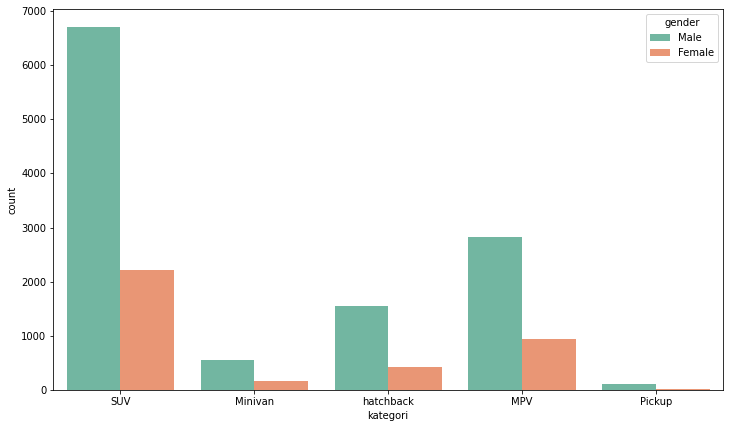

In [ ]:
# Visualisasi data dengan countplot 
plt.figure(figsize=(12,7))
sns.countplot(x='kategori', hue='gender', data=df, palette='Set2' )

Kita juga dapat dengan mudah membuat visualisasi kolom yang berisi nilai kategori berdasarkan kolom kategori lainnya. Misalnya disini kita menampilkan visualisasi kolom <code>Test Drive Brand</code> berdasarkan kolom <code>Jenis Kelamin</code>.

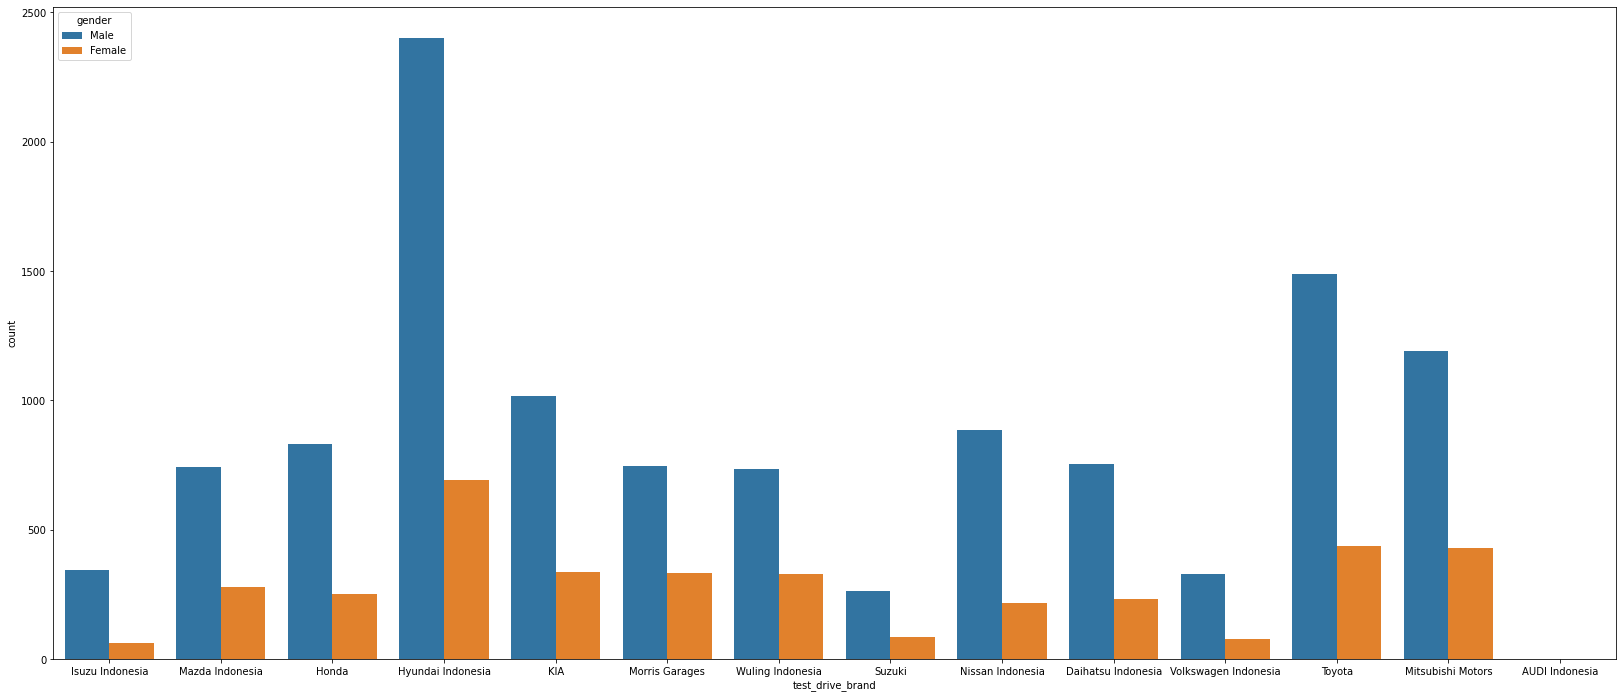

In [ ]:
# Menampilkan visualisasi perbandingan jumlah data untuk tiap jenis 'Test Drive Brand' berdasarkan kolom 'Gender'
plt.figure(figsize=(28,12))
sns.countplot(x='test_drive_brand', hue='gender', data=df)

Visualisasi <code>Test Drive Brand</code> berdasarkan <code>Kategori</code>.

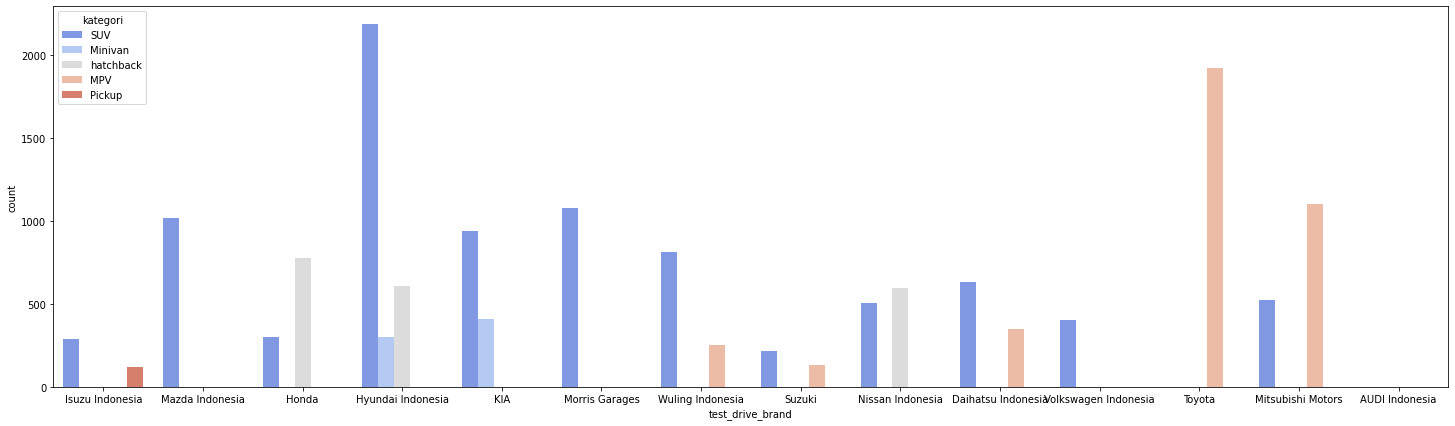

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x='test_drive_brand', hue='kategori', data=df, palette='coolwarm')

Visualisasi <code>Test Drive Brand</code> berdasarkan <code>Provinsi</code>.

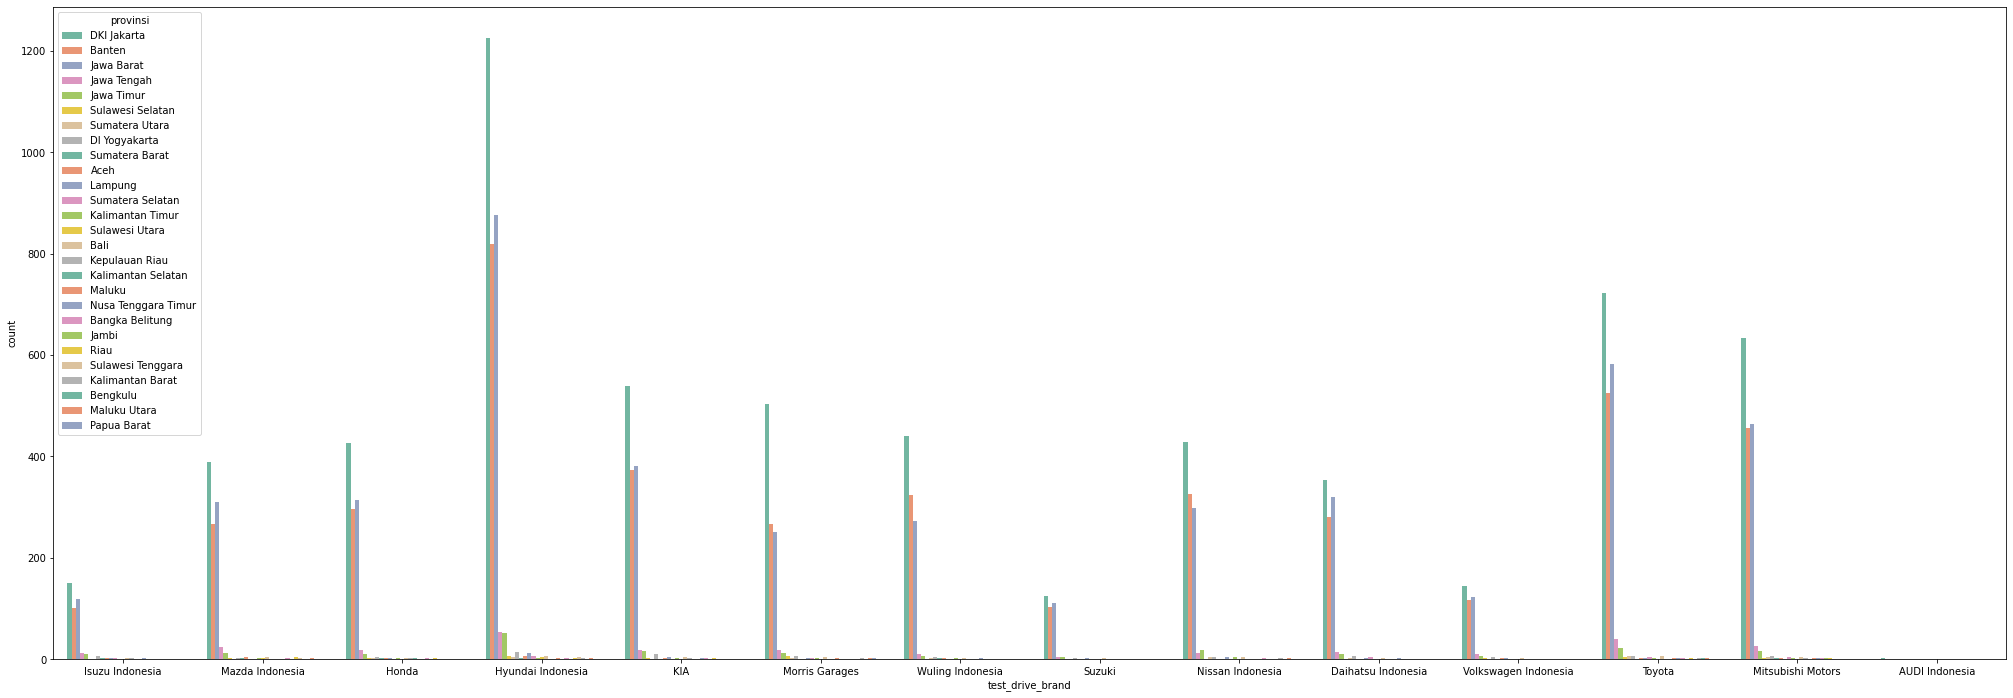

In [ ]:
plt.figure(figsize=(35,12))
sns.countplot(x='test_drive_brand', hue='provinsi', data=df, palette='Set2')

Visualisasi <code>Test Drive Brand</code> berdasarkan <code>Pulau</code>.

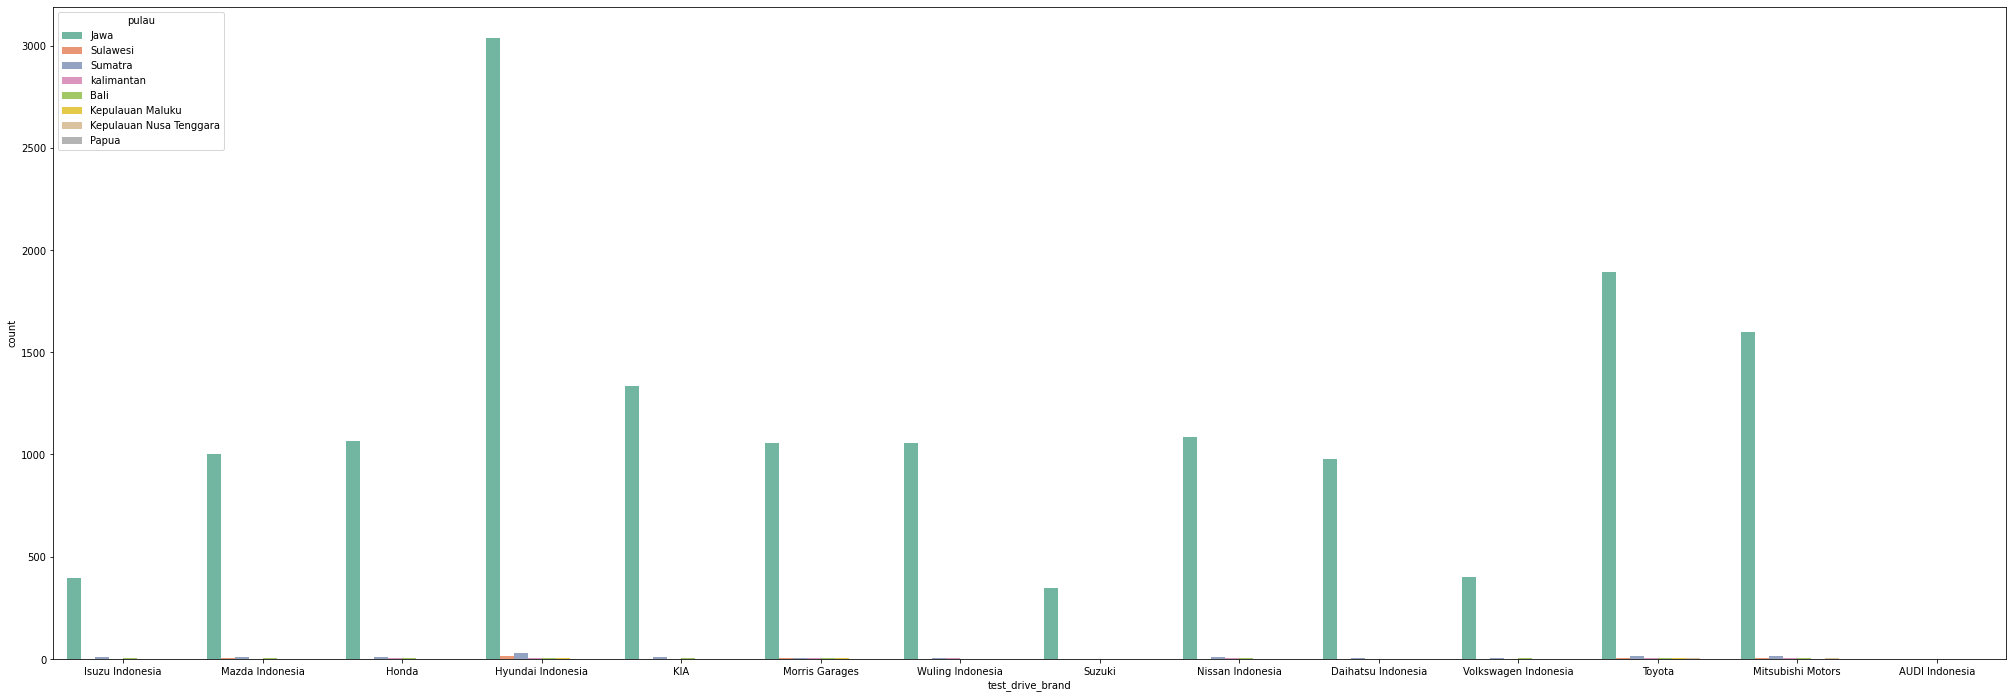

In [ ]:
plt.figure(figsize=(35,12))
sns.countplot(x='test_drive_brand', hue='pulau', data=df, palette='Set2')

Visualisasi Test Drive Brand berdasarkan Kategori Usia.

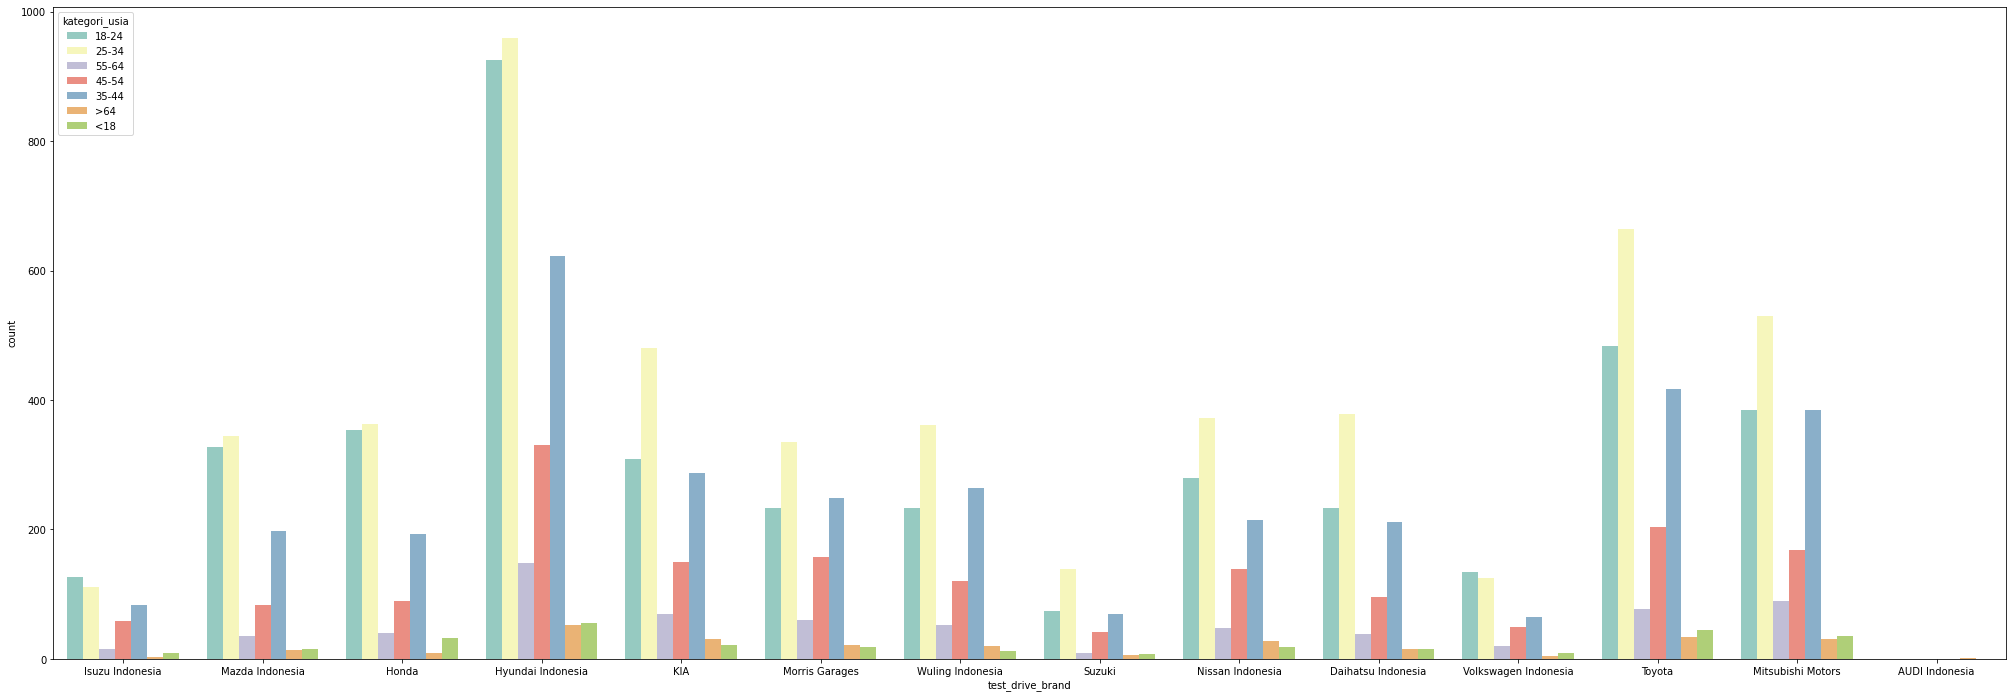

In [ ]:
plt.figure(figsize=(35,12))
sns.countplot(x='test_drive_brand', hue='kategori_usia', data=df, palette='Set3')

In [ ]:
df.head()

,id_ticket,provinsi,kota,gender,tahun_lahir,visit_time,test_drive_brand,vehicle,kategori,Usia,kategori_usia,pulau,group
0,1,DKI Jakarta,Jakarta Selatan,Male,2001.0,2021-11-15 14:00:00,Isuzu Indonesia,MU-X 4x4,SUV,20.0,18-24,Jawa,sport
1,2,Banten,Tangerang Selatan,Male,1999.0,2021-11-14 11:00:00,Mazda Indonesia,CX-3,SUV,22.0,18-24,Jawa,sport
2,3,Banten,"Tangerang, Kab.",Female,1989.0,2021-11-12 14:00:00,Honda,CR-V,SUV,32.0,25-34,Jawa,sport
3,4,DKI Jakarta,Jakarta Selatan,Male,2002.0,2021-11-21 11:00:00,Hyundai Indonesia,STARIA,Minivan,19.0,18-24,Jawa,non-sport
4,5,Jawa Barat,"Bekasi, Kab.",Male,1998.0,2021-11-16 11:00:00,KIA,GRAND CARNIVAL,Minivan,23.0,18-24,Jawa,non-sport


### Data Transform

In [ ]:
df['group'].replace({'sport' : 1,'non-sport' : 0},inplace=True)

In [ ]:
df.head()

,id_ticket,provinsi,kota,gender,tahun_lahir,visit_time,test_drive_brand,vehicle,kategori,Usia,kategori_usia,pulau,group
0,1,DKI Jakarta,Jakarta Selatan,Male,2001.0,2021-11-15 14:00:00,Isuzu Indonesia,MU-X 4x4,SUV,20.0,18-24,Jawa,1
1,2,Banten,Tangerang Selatan,Male,1999.0,2021-11-14 11:00:00,Mazda Indonesia,CX-3,SUV,22.0,18-24,Jawa,1
2,3,Banten,"Tangerang, Kab.",Female,1989.0,2021-11-12 14:00:00,Honda,CR-V,SUV,32.0,25-34,Jawa,1
3,4,DKI Jakarta,Jakarta Selatan,Male,2002.0,2021-11-21 11:00:00,Hyundai Indonesia,STARIA,Minivan,19.0,18-24,Jawa,0
4,5,Jawa Barat,"Bekasi, Kab.",Male,1998.0,2021-11-16 11:00:00,KIA,GRAND CARNIVAL,Minivan,23.0,18-24,Jawa,0


Kemudian disini kita akan memisahkan kolom fitur dan kolom target. Kolom target adalah kolom <code>Kategori</code>, sedangkan sisanya merupakan kolom fitur.

In [ ]:
# Mendefinisikan kolom fitur dan target

df_features = df.drop('group', axis=1)
df_target = df['group']

Mari kita lihat hasil dari <code>df_features</code> yang telah kita buat untuk menampung kolom fitur.

In [ ]:
# Menampilkan kolom fitur
df_features

,id_ticket,provinsi,kota,gender,tahun_lahir,visit_time,test_drive_brand,vehicle,kategori,Usia,kategori_usia,pulau
0,1,DKI Jakarta,Jakarta Selatan,Male,2001.0,2021-11-15 14:00:00,Isuzu Indonesia,MU-X 4x4,SUV,20.0,18-24,Jawa
1,2,Banten,Tangerang Selatan,Male,1999.0,2021-11-14 11:00:00,Mazda Indonesia,CX-3,SUV,22.0,18-24,Jawa
2,3,Banten,"Tangerang, Kab.",Female,1989.0,2021-11-12 14:00:00,Honda,CR-V,SUV,32.0,25-34,Jawa
3,4,DKI Jakarta,Jakarta Selatan,Male,2002.0,2021-11-21 11:00:00,Hyundai Indonesia,STARIA,Minivan,19.0,18-24,Jawa
4,5,Jawa Barat,"Bekasi, Kab.",Male,1998.0,2021-11-16 11:00:00,KIA,GRAND CARNIVAL,Minivan,23.0,18-24,Jawa
...,...,...,...,...,...,...,...,...,...,...,...,...
15473,17287,Banten,Cilegon,Male,1984.0,2021-11-16 11:00:00,Toyota,VELOZ,MPV,37.0,35-44,Jawa
15474,17288,Jawa Barat,"Bekasi, Kota",Male,1973.0,2021-11-14 11:00:00,Mitsubishi Motors,XPANDER CROSS,MPV,48.0,45-54,Jawa
15475,17290,Jawa Barat,"Bogor, Kab.",Female,2002.0,2021-11-15 11:00:00,Hyundai Indonesia,IONIQ,hatchback,19.0,18-24,Jawa
15476,17292,Jawa Barat,"Bekasi, Kab.",Male,1997.0,2021-11-15 11:00:00,Mazda Indonesia,CX-3,SUV,24.0,18-24,Jawa


### Encoding

Selanjutnya adalah melakukan <i>encoding</i> terhadap data yang memiliki nilai kategori seperti pada kolom <code>Gender</code>, <code>Test Drive Brand</code> dan <code>Vehicle</code>. Disini kita akan menggunakan atribut Pandas <code>.cat.codes</code> untuk <i>encoding</i> data tersebut.

Nah, seperti yang kita lihat dari hasil <code>info()</code>, tipe data untuk kolom-kolom tersebut adalah <i>object</i>, sementara <code>.cat.codes</code> hanya dapat diaplikasikan pada kolom dengan tipe __category__. Karena itu, kita harus mengubah dulu tipe data dari kolom-kolom tersebut dengan <i>method</i> <code>astype()</code>. Perhatikan kode berikut.

In [ ]:
# Mengubah tipe data menjadi category
df_features[['gender', 'test_drive_brand', 'pulau', 'kategori_usia']] = df_features[['gender', 'test_drive_brand', 'pulau', 'kategori_usia']].astype('category')

# Cek hasil perubahan tipe data
df_features[['gender', 'test_drive_brand', 'pulau', 'kategori_usia']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15478 entries, 0 to 15477
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            15478 non-null  category
 1   test_drive_brand  15478 non-null  category
 2   pulau             15478 non-null  category
 3   kategori_usia     15478 non-null  category
dtypes: category(4)
memory usage: 62.2 KB


Setelah tipe data diubah menjadi <i>category</i>, kita dapat langsung mengaplikasikan atribut <code>.cat.codes</code> untuk tiap kolom seperti di bawah ini.

In [ ]:
# Encoding data dengan .cat.codes

df_features['gender'] = df_features['gender'].cat.codes
df_features['test_drive_brand'] = df_features['test_drive_brand'].cat.codes
df_features['pulau'] = df_features['pulau'].cat.codes
df_features['kategori_usia'] = df_features['kategori_usia'].cat.codes

Mari kita lihat hasil <i>encoding</i>-nya.

In [ ]:
# Menampilkan 5 data teratas

df_features.head()

,id_ticket,provinsi,kota,gender,tahun_lahir,visit_time,test_drive_brand,vehicle,kategori,Usia,kategori_usia,pulau
0,1,DKI Jakarta,Jakarta Selatan,1,2001.0,2021-11-15 14:00:00,4,MU-X 4x4,SUV,20.0,0,1
1,2,Banten,Tangerang Selatan,1,1999.0,2021-11-14 11:00:00,6,CX-3,SUV,22.0,0,1
2,3,Banten,"Tangerang, Kab.",0,1989.0,2021-11-12 14:00:00,2,CR-V,SUV,32.0,1,1
3,4,DKI Jakarta,Jakarta Selatan,1,2002.0,2021-11-21 11:00:00,3,STARIA,Minivan,19.0,0,1
4,5,Jawa Barat,"Bekasi, Kab.",1,1998.0,2021-11-16 11:00:00,5,GRAND CARNIVAL,Minivan,23.0,0,1


In [ ]:
df_features['test_drive_brand'] = pd.to_numeric(df_features['test_drive_brand'])
df_features['kategori_usia'] = pd.to_numeric(df_features['kategori_usia'])
df_features['pulau'] = pd.to_numeric(df_features['pulau'])

In [ ]:
df_features.dtypes

id_ticket                    int64
provinsi                    object
kota                        object
gender                        int8
tahun_lahir                float64
visit_time          datetime64[ns]
test_drive_brand              int8
vehicle                     object
kategori                    object
Usia                       float64
kategori_usia                 int8
pulau                         int8
dtype: object

In [ ]:
# Normalisasi data

# Mendefinisikan data fitur

X = df_features[[ 'gender','test_drive_brand', 'kategori_usia','pulau']].values

Data fitur sudah siap digunakan dan disimpan dalam variabel <code>X</code>. Sekarang kita definisikan data targetnya, misalnya disini kita masukkan dalam variabel <code>y</code>.

In [ ]:
# Mendefinisikan data target

y = df_target

### Train test split

Setelah data fitur dan target telah siap digunakan untuk pemodelan, tahap selanjutnya adalah membagi data tersebut menjadi <i>training data</i> dan <i>testing data</i>. Disini kita akan menggunakan <code>train_test_split()</code> dari Scikit-Learn.

__Train test split__ membagi data tersebut menjadi <i>training data</i> yang digunakan untuk melatih model <i>machine learning</i> dan <i>testing data</i> yang digunakan untuk mengevaluasi kinerja <i>machine learning</i> tersebut.

Kita akan memberikan proporsi untuk data testing sebesar __20%__ yang didefinisikan pada parameter <code>test_size = 0.2</code>.

In [ ]:
# Train test split untuk membagi data training dan testing

from sklearn.model_selection import train_test_split

# Memisahkan data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


## Model

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# Membuat model dengan random forest
model_rf = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=1,n_jobs=2)
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=2, random_state=1)

In [ ]:
# Menguji model
y_pred = model_rf.predict(X_test)

In [ ]:
from sklearn import metrics

# Menampilkan akurasi
print('Akurasi Random Forest :', metrics.accuracy_score(y_test, y_pred))

Akurasi Random Forest : 0.7748708010335917


In [ ]:
from sklearn.metrics import classification_report

# Menampilkan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1328
           1       0.77      0.87      0.81      1768

    accuracy                           0.77      3096
   macro avg       0.78      0.76      0.76      3096
weighted avg       0.78      0.77      0.77      3096



### K-Fold Random Forest

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean

# define model
model = RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 random_state=1,
                                 n_jobs=2)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))
# Cross validation scores
f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', error_score='raise')
print("F1_scores per fold : ",f1_scores," \nMean F1_score= ",mean(f1_scores))

Mean ROC AUC: 0.84396
F1_scores per fold :  [0.81648936 0.82159315 0.80685564 0.80769231 0.80943026 0.81132075
 0.80366492 0.8129544  0.82106685 0.80371353 0.81254082 0.81662269
 0.8168643  0.80683311 0.80898876 0.81216931 0.81196013 0.80673401
 0.78905207 0.81902246 0.80453636 0.8139382  0.81525312 0.7989312
 0.81056106 0.81124498 0.82247765 0.81535407 0.82222222 0.81109643]  
Mean F1_score=  0.8113728037641814


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
clf = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0, max_depth=1, 
                                 random_state=0).fit(X_train, y_train)
#clf.score(x_test, y_test)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_predTest)


print('Model training Score: %.3f' % accuracy_score(y_train, y_predTrain),
      'Model test Score: %.3f' %accuracy_score(y_test, y_predTest))
print(confusion_matrix)
print(classification_report(y_test, y_predTest))

Model training Score: 0.769 Model test Score: 0.764
[[ 872  456]
 [ 275 1493]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.70      1328
           1       0.77      0.84      0.80      1768

    accuracy                           0.76      3096
   macro avg       0.76      0.75      0.75      3096
weighted avg       0.76      0.76      0.76      3096



### K-Fold Gradient Boosting

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier


# define model
model = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0, max_depth=1, 
                                 random_state=0)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))
# Cross validation scores
f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', error_score='raise')
print("F1_scores per fold : ",f1_scores," \nMean F1_score= ",mean(f1_scores))

Mean ROC AUC: 0.84090
F1_scores per fold :  [0.80913978 0.8139382  0.81358189 0.79731544 0.81167109 0.8173456
 0.80204997 0.80722892 0.82009504 0.79784367 0.81510417 0.81553398
 0.81012658 0.79308051 0.81204013 0.81254169 0.80561122 0.80136054
 0.81578947 0.82017253 0.80758808 0.80213904 0.81333333 0.79624665
 0.81245858 0.80810811 0.81558442 0.81526104 0.81848627 0.80375084]  
Mean F1_score=  0.8094842257711719


### Voting

In [ ]:
#voting
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean


# group / ensemble of models
estimator = []
estimator.append(('GB', 
                  GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0, max_depth=1, 
                                 random_state=0)))

estimator.append(('RandomForestClassifier', RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 random_state=1,
                                 n_jobs=2)))
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score %0.2f" % score)
print(classification_report(y_test, y_pred))

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


# evaluate model
rocscores = cross_val_score(vot_soft, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
accscores = cross_val_score(vot_soft, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
f1scores = cross_val_score(vot_soft, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print("F1_scores per fold : ",f1scores," \nMean F1_score= ",mean(f1scores))
print('Mean ROC AUC: %.5f' % mean(rocscores))
print('Acc: %.5f' % mean(accscores))

Soft Voting Score 0.78
              precision    recall  f1-score   support

           0       0.78      0.66      0.72      1328
           1       0.77      0.86      0.81      1768

    accuracy                           0.78      3096
   macro avg       0.78      0.76      0.77      3096
weighted avg       0.78      0.78      0.77      3096

F1_scores per fold :  [0.82098361 0.82018111 0.81447368 0.80769231 0.80870712 0.81654436
 0.8038835  0.8139382  0.82643525 0.8042328  0.81151832 0.82214984
 0.81608438 0.8        0.81812125 0.81291173 0.81515349 0.80805369
 0.79814077 0.82213439 0.8069241  0.81447368 0.81535407 0.79705291
 0.81056106 0.81324503 0.82337829 0.8166777  0.82213439 0.81109643]  
Mean F1_score=  0.8130745823643568
Mean ROC AUC: 0.84626
Acc: 0.77096


In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
from matplotlib import pyplot
 
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('GB', 
                  GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0, max_depth=1, 
                                 random_state=0)))
	models.append(('RandomForestClassifier', RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 random_state=1,
                                 n_jobs=2)))
	models.append(('SVM', SVC(C=64.0, kernel="rbf", gamma="auto",probability=True)))
	models.append(('XGB', XGBClassifier(scale_pos_weight=99)))
	
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='soft')
	return ensemble

# get a list of models to evaluate
def get_models():
	models = dict()
	models['GB'] = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0, max_depth=1, 
                                 random_state=0)
	models['RF'] = RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 random_state=1,
                                 n_jobs=2)
	models['SVM'] = SVC(C=64.0, kernel="rbf", gamma="auto",probability=True)
	models['XGB'] = XGBClassifier(scale_pos_weight=99)
	models['soft_voting'] = get_voting()
	return models

models = get_models() 
# evaluate a give model using cross-validation


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [ ]:
scores = cross_val_score(models['soft_voting'], X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')




print('Acc: %.5f' % mean(scores))

KeyboardInterrupt: ignored

In [ ]:
rocscores = cross_val_score(models['soft_voting'], X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)	 

print('Mean ROC AUC: %.5f' % mean(rocscores))

KeyboardInterrupt: ignored

In [ ]:
f1scores = cross_val_score(models['soft_voting'], X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
print("F1_scores per fold : ",f1scores," \nMean F1_score= ",mean(f1scores))

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Melatih model
model = SVC(C=64.0, kernel="rbf", gamma="auto").fit(X_train, y_train)

# Menguji model / memprediksi dengan X_test
y_pred = model.predict(X_test)
# Menampilkan akurasi data latih dan data uji
print('Akurasi Train set: %.3f' % accuracy_score(y_train, model.predict(X_train)))
print('Akurasi Test set: %.3f' % accuracy_score(y_test, y_pred))
# Menampilkan classification report
print(classification_report(y_test, y_pred))

### K-Fold SVM

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

# define model
model = SVC(C=64.0, kernel="rbf", gamma="auto")

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))
# Cross validation scores
f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', error_score='raise')
print("F1_scores per fold : ",f1_scores," \nMean F1_score= ",mean(f1_scores))

### K-Fold XGB

In [ ]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model = XGBClassifier(scale_pos_weight=99)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))
# Cross validation scores
f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1', error_score='raise')
print("F1_scores per fold : ",f1_scores," \nMean F1_score= ",mean(f1_scores))

f1_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', error_score='raise')
print('Accuracy : %.5f' % mean(f1_scores))

### SMOTE

In [ ]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


### Random Forest After SMOTE

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean

# define model
model = RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 random_state=1,
                                 n_jobs=2)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))
# Cross validation scores
f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', error_score='raise')
print("F1_scores per fold : ",f1_scores," \nMean F1_score= ",mean(f1_scores))

### Gradient Boosting After SMOTE

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0, max_depth=1, 
                                 random_state=0).fit(X_train, y_train)
#clf.score(x_test, y_test)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_predTest)


print('Model training Score: %.3f' % accuracy_score(y_train, y_predTrain),
      'Model test Score: %.3f' %accuracy_score(y_test, y_predTest))
print(confusion_matrix)
print(classification_report(y_test, y_predTest))

### XGB After SMOTE

In [ ]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model = XGBClassifier(scale_pos_weight=99)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))
f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', error_score='raise')
print("F1_scores per fold : ",f1_scores," \nMean F1_score= ",mean(f1_scores))

### SVM After SMOTE

In [ ]:
from sklearn.svm import SVC

# Melatih model
model = SVC(gamma='scale').fit(X_train, y_train)

# Menguji model / memprediksi dengan X_test
y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score

# Menampilkan akurasi data latih dan data uji
print('Akurasi Train set: %.3f' % accuracy_score(y_train, model.predict(X_train)))
print('Akurasi Test set: %.3f' % accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report

# Menampilkan classification report
print(classification_report(y_test, y_pred))